# Milestone 3 - DVC

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [5]:
print("Checking DVC Status\n")
!dvc status

print("\nDVC Remote List\n")
!dvc remote list

Checking DVC Status

../data/raw.dvc:                                                                
	changed outs:
		modified:           ../data/raw

DVC Remote List

localremote	/home/yassinemaatougui/dvcstore
localstore	/home/yassinemaatougui/dvcstore
gdrive_remote	gdrive://1jif_RXj_CsV3t1fU0ODfzMLOHfxZVmTz


In [8]:
print("\nData Directory Tree\n")
!tree ../data


Data Directory Tree

../data
├── processed
├── raw
│   ├── image_urls_only
│   │   └── product_image_urls.csv
│   ├── product_features_flat.parquet
│   ├── product_features.parquet
│   ├── product_features.parquetBackup
│   ├── product_image_urls.csv
│   ├── query_features.csv
│   ├── query_features_final.csv
│   ├── query_features_flat.csv
│   ├── query_features_flat.parquet
│   ├── query_features.parquet
│   ├── query_features_with_timestamp.csv
│   ├── query_features_with_timestamp.parquet
│   └── supp_product_image_urls.csv
├── raw.dvc
└── validate

5 directories, 14 files



Dataset Sizes (MB)

                                     File      Size_MB
1           product_features_flat.parquet  1428.910582
7                product_features.parquet   872.547680
6                      query_features.csv   101.720486
4                query_features_final.csv   101.669180
11      query_features_with_timestamp.csv    82.918806
10                query_features_flat.csv    82.636934
2   query_features_with_timestamp.parquet    64.419764
5             query_features_flat.parquet    64.419696
9                  query_features.parquet    24.911501
3                  product_image_urls.csv    11.424785
0             supp_product_image_urls.csv     1.892173
8          product_features.parquetBackup     0.000128


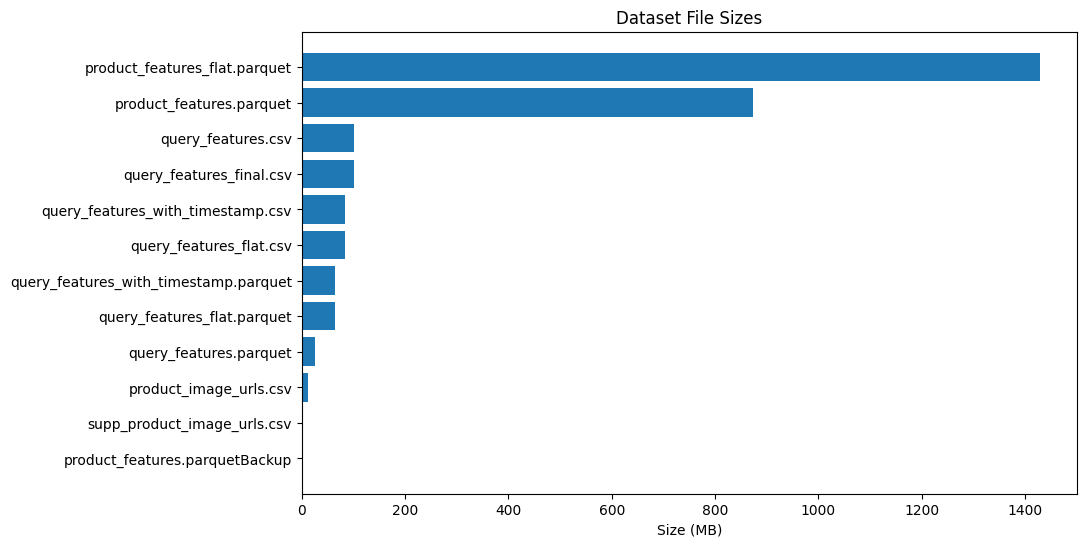

In [10]:
data_dir = "../data/raw/"

files = [f for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))]

sizes = {file: os.path.getsize(os.path.join(data_dir, file)) / (1024*1024) for file in files}  # in MB
sizes_df = pd.DataFrame(list(sizes.items()), columns=["File", "Size_MB"])

sizes_df.sort_values("Size_MB", ascending=False, inplace=True)

print("\nDataset Sizes (MB)\n")
print(sizes_df)

plt.figure(figsize=(10,6))
plt.barh(sizes_df['File'], sizes_df['Size_MB'])
plt.xlabel("Size (MB)")
plt.title("Dataset File Sizes")
plt.gca().invert_yaxis()
plt.show()

In [12]:
print("\n Git Commit History\n")
!git log --oneline | head -n 5

print("\n DVC Tracked Files\n")
!dvc list .

print("\n DVC Files in Repository\n")
!find . -name '*.dvc'


 Git Commit History

1dd171b Remove redundant DVC-tracked data folder from feature_repo
1e0ca52 UPDATING materialize by chunks script
5a341fa Adding Visualization scripts
92bc8c5 fix: properly track raw and feature store data with DVC
f9a0a76 Remove .gitattributes for LFS cleanup

 DVC Tracked Files

../../.dvcignore
../../.gitignore
../../LICENSE
../../Milestone 1
../../Milestone 2
../../Milestone 3
../../README.md

 DVC Files in Repository

